# Описание проекта

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Проект содержит две части.**

Часть 1. Приоритизация гипотез.

Часть 2. Анализ A/B-теста:

• График кумулятивной выручки, среднего чека, конверсии по группам.

• График относительного изменения кумулятивного среднего чека, конверсии группы B к группе A.

• Точечный график количества заказов по пользователям.

• 95-й и 99-й перцентили количества заказов на пользователя.

• Точечный график стоимостей заказов.

• 95-й и 99-й перцентили стоимости заказов.

• Рассчитана статистическая значимость различий в конверсии, в среднем чеке заказа между группами по «сырым» данным.

• Рассчитана статистическая значимость различий в конверсии, в среднем чеке заказа между группами по «очищенным» данным.

• Выводы по результатам теста.

## <font color='blue'>Часть 1. Приоритизация гипотез.</font> <a class="tocSkip">

***Проверка гипотез чаще всего стоит дорого, а ресурсов не хватает. Приходится выбирать, что будем тестировать, а чему скажем «нет». Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируют.***

**Задача:**
<br> * Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
<br> * Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
<br> * Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

### <font color='blue'>Импорт библиотек</font> <a class="tocSkip">

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
from IPython.display import display
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mth
import datetime as dt
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
pd.set_option('display.max_colwidth', -1)

### <font color='blue'>Загрузка и изучение данных</font> <a class="tocSkip">

In [2]:
hypothesis= pd.read_csv('/datasets/hypothesis.csv')


hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Описание данных:**

**Данные для первой части:**
<br> Файл /datasets/hypothesis.csv:
<br> * Hypothesis — краткое описание гипотезы;
<br> * Reach — охват пользователей по 10-балльной шкале;
<br> * Impact — влияние на пользователей по 10-балльной шкале;
<br> * Confidence — уверенность в гипотезе по 10-балльной шкале;
<br> * Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### <font color='blue'>1.1 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.</font> <a class="tocSkip">

***ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота» или impact, confidence / effort «влияние, уверенность/ усилия»)***

<br> * Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
<br> * Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
<br> * Efforts — сколько стоит протестировать эту гипотезу.

In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis_ICE = hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
hypothesis_ICE

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### <font color='blue'>1.2 Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.</font> <a class="tocSkip">

***RICE (от англ. reach, impact, confidence/ effort «охват, влияние, уверенность/ усилия»)***

<br> * Reach — скольких пользователей затронет изменение, которое вы хотите внести;
<br> * Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
<br> * Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
<br> * Efforts — сколько стоит протестировать эту гипотезу.

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis_RICE = hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
hypothesis_RICE

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


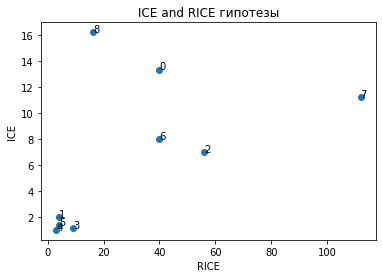

In [5]:
y = hypothesis['ICE'] #шкала y
z = hypothesis['RICE'] #цифра рядом с точкой   
n = hypothesis.index #номер гипотезы

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE"); 

**Вывод:**
<br> параметр охвата (Reach), использующийся в методе RICE изменил приоритетность, полученную по методу ICE:

<br> * без учета охвата на первом месте идет акция со скидкой имениннику (8), но параметр Reach справедливо понизил приоритет этой акции, т.к. и правда, охват её минимальный (по сравнению с другими гипотезами увеличения выручки);
<br> * также произошло и с гипотезой о добавлении 2х каналов трафика (0), с организацией своей службы доставки (1) и с идеей о добавлении страницы отзывов (5);
<br> * без изменений осталась рейтинговая позиция гипотез о добавлении баннеров с актуальными акциями на главную страницу (6) и идея с изменением цвета фона главной страницы (4);
<br> * выросли в рейтинге (стали более приоритетными) RICE (по сравнению с ICE) гипотеза о добавлении формы подписки на все основные страницы ресурса (7), о добавлении блоков рекомендаций товаров (2) и предложение об изменении структуры категорий (3).

**1.2.1 Сравнительный анализ:**

In [6]:
priority_of_hypothesis = hypothesis_ICE.merge(hypothesis_RICE, on='Hypothesis')
priority_of_hypothesis

,Hypothesis,ICE,RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


## <font color='blue'>Часть 2. Анализ A/B-теста.</font> <a class="tocSkip">

***Один из самых популярных и точных способов проверки гипотезы — A/B-тест.***

**Задача:**
<br> * Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
<br> * Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
<br> * Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
<br> * Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
<br> * Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
<br> * Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
<br> * Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
<br> * Построить точечный график стоимостей заказов. Сделать выводы и предположения.
<br> * Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
<br> * Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
<br> * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
<br> * Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
<br> * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
<br> * Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3.

### <font color='blue'>Загрузка и изучение данных</font> <a class="tocSkip">

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

**Таблица orders**

In [8]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**Описание данных:**

**Данные для второй части:**
<br> Файл /datasets/orders.csv:
<br> * transactionId — идентификатор заказа;
<br> * visitorId — идентификатор пользователя, совершившего заказ;
<br> * date — дата, когда был совершён заказ;
<br> * revenue — выручка заказа;
<br> * group — группа A/B-теста, в которую попал заказ.

В файле /datasets/orders.csv 5 столбцов (3 столбца с чиловым типом данных, 2 - тип данных object), 1197 строк (непустых значений), столбец date имеет тип object, хотя там дата. Изменим формат данных в нём. Изменим навзания столбцов.

**Таблица visitors**

In [9]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Описание данных:**

**Данные для второй части:**
<br> Файл /datasets/visitors.csv:
<br> * date — дата;
<br> * group — группа A/B-теста;
<br> * visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

В файле /datasets/visitors.csv 3 столбца (1 столбец с чиловым типом данных, 2 - тип данных object), 62 строки (непустых значений), столбец date имеет тип object, хотя там дата. Изменим формат данных в нём.

Проверим, есть ли пользователи, которые оказались в обеих группах одновременно.

In [10]:
group_sizes = orders.groupby(['visitorId', 'group']).size().reset_index()
group_sizes.columns = ['visitorId', 'group', 'count']
group_sizes = group_sizes.query('count > 1').sort_values(by='visitorId')
group_sizes

,visitorId,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2
...,...,...,...
1045,4109358064,A,2
1050,4134830387,B,2
1065,4186807279,B,2
1079,4256040402,A,7


Формируем словарь "пользователь - группы, в которых он появлялся" и если одному пользователю принадлежит более 1 значения групп, добавляем его в список broken_users:

In [11]:
potentially_broken_users_list = list(zip(group_sizes['visitorId'], group_sizes['group']))
potentially_broken_users_dict = defaultdict(list)
for user, group in potentially_broken_users_list:
    potentially_broken_users_dict[user].append(group)

inappropriate_users = [user for user in potentially_broken_users_dict if len(potentially_broken_users_dict[user]) > 1]
inappropriate_orders = orders.query('visitorId in @inappropriate_users')
inappropriate_orders_grouped = (inappropriate_orders
                        .groupby(['visitorId', 'group', 'date'])
                        .agg({'transactionId': 'nunique', 'revenue': 'sum'})
                   )
inappropriate_orders_grouped

transactionId  revenue
visitorId  group date                              
1230306981 A     2019-08-09  3              18440  
           B     2019-08-09  2              12840  
2038680547 A     2019-08-04  2              4070   
                 2019-08-17  1              3470   
                 2019-08-22  1              760    
                 2019-08-25  1              270    
           B     2019-08-04  1              2800   
                 2019-08-15  1              1680   
                 2019-08-29  1              2420   
2378935119 A     2019-08-10  1              58220  
                 2019-08-15  1              1650   
                 2019-08-17  1              310    
                 2019-08-22  1              3390   
           B     2019-08-09  1              30649  
                 2019-08-10  1              2640   
                 2019-08-25  1              21220  
                 2019-08-28  2              24860  
2458001652 A     2019-08-04  1              340    
                 2019-08-06  1              1620   
                 2019-08-07  1              17379  
                 2019-08-11  1              8280   
                 2019-08-22  1              5190   
           B     2019-08-05  1              2420   
                 2019-08-06  2              14030  
                 2019-08-08  1              5227   
                 2019-08-09  1              5227   
                 2019-08-25  1              2385   
4256040402 A     2019-08-01  1              5800   
                 2019-08-12  1              50     
                 2019-08-17  1              1550   
                 2019-08-20  1              17650  
                 2019-08-23  1              16950  
                 2019-08-27  1              1630   
                 2019-08-31  1              5170   
           B     2019-08-08  1              58220  
                 2019-08-16  1              56650  
                 2019-08-18  1              10970  
                 2019-08-31  1              1850

Пять пользователей оказались в двух группах одновременно, они совершили достаточно много транзакций и принесли значимую суму выручки, поэтому нужно очистить наши таблицы от этих пользователей, для корретного А/В теста

In [12]:
orders_filt = orders.query('visitorId not in @inappropriate_orders')

Теперь отфильтруем таблицу visitors

In [13]:
inappropriate_orders_grouped = inappropriate_orders_grouped.reset_index()
inappropriate_orders_grouped['count'] = -1
inappropriate_orders_grouped = inappropriate_orders_grouped[['group', 'date', 'count']]
visitors_filt = visitors.merge(inappropriate_orders_grouped, on=['date', 'group'], how='left').fillna(0)
visitors_filt['visitors_'] = visitors_filt['visitors'] + visitors_filt['count']
visitors_filt = visitors_filt.drop(['visitors', 'count'], axis=1)
visitors_filt.columns = ['date', 'group', 'visitors']
visitors_filt['visitors'] = visitors_filt['visitors'].astype(int)

Так как в рамках этого A/B теста не пользователей, а сесии разделяли на группы, то проблемы в том, что пользователь попал в обе группы, нет. Просто пользователь совершил несколько сессий, которые определились в разные группы.

In [14]:
#переведем столбцы с датой к соответстующим типам
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
#изменим навзания столбцов
orders = orders.rename(columns=
                   {
                       'transactionId': 'orderId',
                       'visitorId': 'userId',
                   }
                  )
#проверим перевелись ли к нужному типу столбец
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
orderId    1197 non-null int64
userId     1197 non-null int64
date       1197 non-null datetime64[ns]
revenue    1197 non-null int64
group      1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [15]:
orders.isnull().sum() # проверим наличие пропусков

orderId    0
userId     0
date       0
revenue    0
group      0
dtype: int64

In [16]:
orders.duplicated().sum() # проверим наличие дубликатов

0

In [17]:
visitors.isnull().sum() # проверим наличие пропусков

date        0
group       0
visitors    0
dtype: int64

In [18]:
visitors.duplicated().sum() # проверим наличие дубликатов

0

**Проверим корректность распределения на группы A/B:**
<br> * Проверим размеры групп в выборке, есть ли разница между ними;
<br> * Проверим, корректно ли был рассчитан размер выборки для проведения теста.

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Кол-во покупок в группе A: 557
Кол-во покупок в группе B: 640


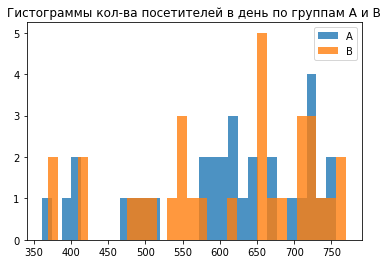

P-value:0.36506882746952496
Разница в количестве посетителей в группах A и B статистически НЕ значима

Начальная конверсия: 0.030
Полученная после изменений конверсия: 0.034
Относительное изменение конверсии после изменений: 0.121

Вводим начальную конверсию и полученное относительное изменение конверсии в калькулятор
Сайт калькулятора: https://www.evanmiller.org/ab-testing/sample-size.html
Получаем необходимое количество выборки 35855 для корректного проведения тестирования
В нашем случае количество 37652 посещений
Кол-во выборки для A/B тестирования корректно подобрано, статистически значимой разницы
в количестве посещений м/у группами не обнаружено




In [19]:
print('Кол-во посетителей в группе А: {}\n'
      'Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                                 visitors[visitors['group']=='B']['visitors'].sum()))
purchasesA = len(orders[orders['group']=='A'])
purchasesB = len(orders[orders['group']=='B'])
print('Кол-во покупок в группе A: {}'.format(purchasesA))
print('Кол-во покупок в группе B: {}'.format(purchasesB))
plt.hist(visitors[visitors['group']=='A']['visitors'], alpha = 0.8, label='A', bins = 30)
plt.hist(visitors[visitors['group']=='B']['visitors'], alpha = 0.8, label='B', bins = 30)
plt.legend()
plt.title('Гистограммы кол-ва посетителей в день по группам A и B')
plt.show()
results = st.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('P-value:{}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима\n')
else:
    print('Разница в количестве посетителей в группах A и B статистически НЕ значима\n')

initial_conversion = len(orders[orders['group']=='A']) / visitors[visitors['group']=='A']['visitors'].sum() 
resulting_conversion = len(orders[orders['group']=='B']) / visitors[visitors['group']=='B']['visitors'].sum()
print('Начальная конверсия: {:.3f}'.format(initial_conversion))
print('Полученная после изменений конверсия: {:.3f}'.format(resulting_conversion))
print('Относительное изменение конверсии после изменений: {:.3f}'.format(abs(1-(initial_conversion/resulting_conversion))))
print('\nВводим начальную конверсию и полученное относительное изменение конверсии в калькулятор\n'
     'Сайт калькулятора: https://www.evanmiller.org/ab-testing/sample-size.html\n'
     'Получаем необходимое количество выборки 35855 для корректного проведения тестирования\n'
     'В нашем случае количество {} посещений\n'
      'Кол-во выборки для A/B тестирования корректно подобрано, ' 
      'статистически значимой разницы\nв количестве посещений м/у группами не обнаружено\n\n'.format(visitors['visitors'].sum()))

**Вывод:**
<br> Столбцы с датами переведены в нужный формат, дубликатов и пустых значений нет. Пять пользователей оказались в двух группах одновременно, они совершили достаточно много транзакций и принесли значимую суму выручки. Они совершили несколько сессий, которые определились в разные группы. Провел очистку таблицы от этих пользователей

### <font color='blue'>2.1 Проанализируем A/B-тест:</font> <a class="tocSkip">

**2.1.1 Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.**

In [20]:
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [21]:
#достаем уникальные значения дат и групп
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])
datesGroups.head()

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A


In [22]:
#выводим кумулятивные показатели из orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'orderId':'nunique', 'userId':'nunique', 'revenue':'sum'}), axis = 1)
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

ordersAggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [23]:
#выводим кумулятивные показатели из visitors
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'], x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)

visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [24]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

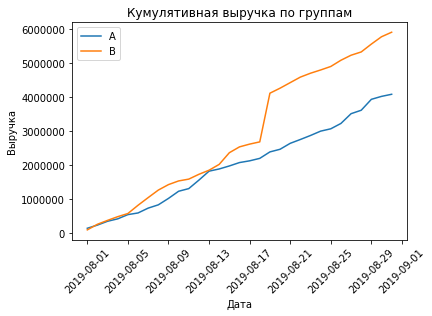

In [26]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.xticks(rotation=45)
plt.title("Кумулятивная выручка по группам") 
plt.xlabel("Дата") 
plt.ylabel("Выручка");
plt.show()

**Вывод:**
<br> Выручка увеличивается в течение всего теста в обеих группах. Однако график выручки группы В в одной точке резко растет, а дальше с таким же коэффициентом увеличивается как и в А. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке в определенный период.

**2.1.2 Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.**

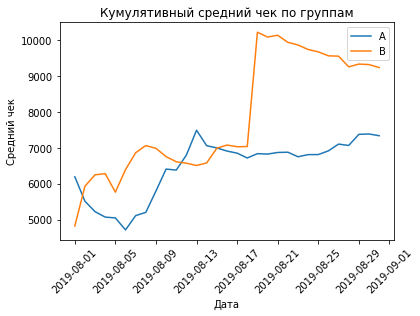

In [27]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("Кумулятивный средний чек по группам") 
plt.xlabel("Дата") 
plt.xticks(rotation=45)
plt.ylabel("Средний чек");
plt.show()

**Вывод:**
<br> Средний чек группы А после снижения идет резко вверх и после небольшого снижения устанавливается равномерно. Средний чек группы В растет рывками, причем последний рывок достаточно резкий, а далее идет снижение. Возможно, в группу B периодически попадали крупные заказы. Но после этих заказов средний чек каждый раз падает. Средний кумулятивный чек группы В выше в большей части времени.

**2.1.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.**

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


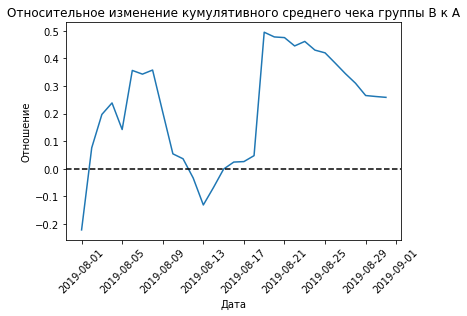

In [29]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.title("Относительное изменение кумулятивного среднего чека группы В к А") 
plt.xlabel("Дата") 
plt.ylabel("Отношение");

plt.show()

**Вывод:**
<br> В нескольких точках график отношения средних чеков между группами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! График сигнализирует о том, что гораздо чаще кумулятивный средний чек группы В больше, чем у А в некоторых случаях разница достигает 30-и почти 50 %.

**2.1.4 Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.**

In [30]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [31]:
print(cumulativeData['date'].min())
cumulativeData['date'].max()

2019-08-01 00:00:00


Timestamp('2019-08-31 00:00:00')

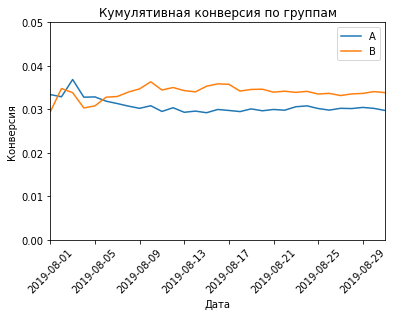

In [32]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0, 0.05]) 
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия по группам") 
plt.xlabel("Дата") 
plt.ylabel("Конверсия");

plt.show()

**Вывод:**
<br> Группы колебались в первые дни, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

**2.1.5 Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.**

In [33]:
display(cumulativeDataA.head())
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


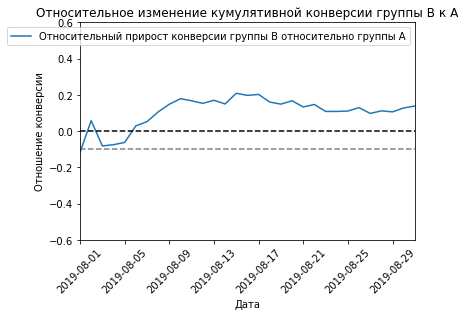

In [35]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]) 
plt.xticks(rotation=45)
plt.title("Относительное изменение кумулятивной конверсии группы В к А") 
plt.xlabel("Дата") 
plt.ylabel("Отношение конверсии");
plt.show()

**Вывод:**
<br> В целом, конверсия группы В выше группы А, только в первые дни было иначе. Прирост относительно группы А составляет 10-20 %.

**2.1.6 Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.**

In [36]:
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [37]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


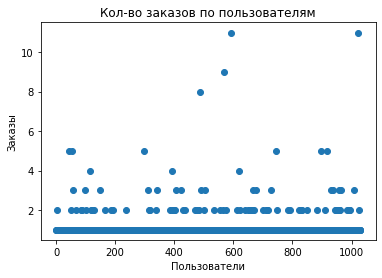

In [38]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title("Кол-во заказов по пользователям") 
plt.xlabel("Пользователи") 
plt.ylabel("Заказы");
plt.show()

In [39]:
ordersByUsers_a = (
    orders.query('group == "A"').drop(['group', 'revenue', 'date'], axis=1)
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)

ordersByUsers_a.columns = ['userId', 'orders']
x_values_a = pd.Series(range(0,len(ordersByUsers_a)))

ordersByUsers_b = (
    orders.query('group == "B"').drop(['group', 'revenue', 'date'], axis=1)
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)

ordersByUsers_b.columns = ['userId', 'orders']
x_values_b = pd.Series(range(0,len(ordersByUsers_b)))

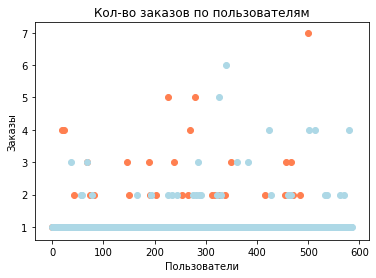

In [40]:
x = x_values_a
y = ordersByUsers_a['orders']

plt.scatter(x, y, c='coral')

x = x_values_b
y = ordersByUsers_b['orders']

plt.scatter(x, y, c='lightblue')

plt.title('Кол-во заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')

plt.show()

**Вывод:**
<br> Выводы подтверждаются: много пользователей с 1-3 заказами, а покупателей с 4 и более заказами – гораздо меньше. Судя по граифкам, подавляющее большинство пользователей не совершает более 2 заказов. В группе В привалируют пользователи с одним заказом, а в А - с двумя, а покупателей с 4 и более заказами – гораздо меньше. В группе В преобладают пользователи с одним заказом, а в А - с двумя, а покупателей с 4 и более заказами – гораздо меньше.

**2.1.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [41]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Вывод:**
<br> 99-му перцентилю соотвествует значение 4, то есть больше 4 заказов сделали меньше 1% пользователей, 95-му перцентилю соотвестует число 2, то есть больше 2 заказов совершили меньше 5% пользователей. Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеем аномальных пользователей по ней. 

**2.1.8 Построим точечный график стоимостей заказов. Сделаем выводы и предположения.**

In [42]:
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


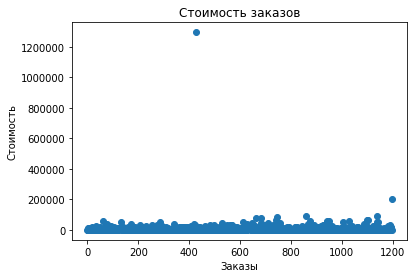

In [43]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.show()

**Вывод по графику:**
<br> Всё, как предполагалось: есть немного дорогих заказов.

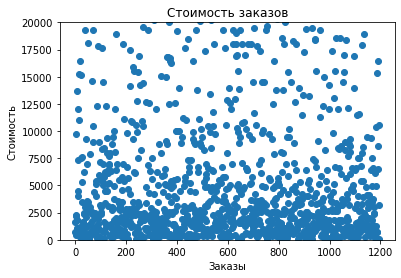

In [44]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.ylim([0, 20000])
plt.show()

**Вывод по графику:**
<br> Большая часть заказов до 2500-3000.

**2.1.9 Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [45]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:**
<br> Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233,20 рублей. Если смотреть в целом на график и перцентили, можно выбрать границу аномальных заказов - 28 000 рублей

**2.1.10 Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.**

In [46]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [47]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [48]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [49]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [50]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [51]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [52]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [53]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [54]:
#Посчитаем статистическую значимость различия в конверсии между группами.
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

display(ordersByUsersA.head())
ordersByUsersB.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [55]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули
#в sampleA содержится выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль. 
#Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. 
#Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — 
#найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
#Выведем относительный прирост конверсии группы B: 
#конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [56]:
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [57]:
print(sampleA.mean())
sampleB.mean()

0.029728864218616567


0.033833791499259885

**Вывод:**
<br> Конверсия группы А = 0,025, группы В = 0,029. Конверсии в группах различаются. - Предположим что это могло произойти случайно. - Пусть нулевая гипотеза звучит так - разница в конверсиях группы А и В НЕ является статистически значимой - Альтернативная - разница в конверсиях группы А и В является статистически значимой.

In [58]:
print("{0:.3f}".format(sps.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


**Вывод:**
<br> По «сырым» данным различия в конверсии групп A и B есть. Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 16% относительно группы А.

**2.1.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.**

In [59]:
print(orders[orders['group']=='A']['revenue'].mean())
orders[orders['group']=='B']['revenue'].mean()

7333.578096947936


9230.875

**Вывод:**
<br> Средний чек группы А = 7189, группы В = 9250. Средние чеки в группах различаются. - Предположим что это могло произойти случайно. - Пусть нулевая гипотеза звучит так - разница в средних чеках группы А и В НЕ является статистически значимой - Альтернативная - разница в средних чеках группы А и В является статистически значимой.

In [60]:
#Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, 
#передадим критерию mannwhitneyu() данные о выручке с заказов.
#А ещё найдём относительные различия в среднем чеке между группами


print('{0:.3f}'.format(sps.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


**Вывод:**
<br> По «сырым» данным статистически значимых различий в среднем чеке нет. P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Но средний чек группы B значительно выше среднего чека группы A, а именно на 29%.

**2.1.12 Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.**

In [61]:
#Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 28 000 рублей. 
#Так мы уберём пользователей с наибольшим числом заказов и пользователей с дорогими заказами. 
#Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, 
#совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
#Узнаем, сколько всего аномальных пользователей методом shape().

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: userId, dtype: int64
(63,)


In [62]:
#Сначала подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
sampleBFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [63]:
print(sampleAFiltered.mean())
sampleBFiltered.mean()

0.026525482646130808


0.030463576158940398

**Вывод:**
<br> Конверсия группы А = 0,024, группы В = 0,028. Конверсии в группах различаются, но уже меньше чем по сырым данным. - Предположим что это могло произойти случайно. - Пусть нулевая гипотеза звучит так - разница в конверсиях группы А и В "по очищенным данным" НЕ является статистически значимой - Альтернативная - разница в конверсиях группы А и В "по очищенным данным" является статистически значимой.

In [64]:
print('{0:.3f}'.format(sps.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.018
0.148


**Вывод:**
<br> По «очищенным» данным статистически значимые различия в конверсии групп A и B есть. Первое число — p-value = 0.013 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 16,2 % относительно группы А. Результаты совпадают с "сырыми" данными.

**2.1.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.**

In [65]:
print(
    '{0:.3f}'.format(
        sps.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative='two-sided'
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.977
-0.017


In [66]:
orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()

5192.066532258064

In [67]:
orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()

5104.890434782608

**Вывод:**
<br> * Средний чек по очищенным данным группы А = 5167, группы В = 5025. Средние чеки в группах различаются немного. - Предположим что это могло произойти случайно. - Пусть нулевая гипотеза звучит так - разница средних чеков группы А и В "по очищенным данным" НЕ является статистически значимой - Альтернативная - разница средних чеков группы группы А и В "по очищенным данным" является статистически значимой.
<br> * По «очищенным» данным статистически значимых различий в среднем чеке нет. P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Но средний чек группы B на 1,7% ниже чека группы A.

**2.1.14 Примем решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.**

**Вывод:**
<br> * Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. У нас на некоторое время возникли сомнения из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей. Наши сомнения подтвердились на этот счет, т.к. после очистки разница между средними чеками стала минимальна, но это не даёт нам повода сомневаться в проведении теста и его результатах.
<br> * До и после очистки данных, показатель конверсии в группе B больше показателя в группе A - сначала на 14% до и на 17% после очистки данных.
<br> * График различия среднего чека говорит о том, что гораздо чаще кумулятивный средний чек группы В больше, чем у А, а в некоторых случаях разница достигает от 30 до почти 50 %.
<br> * Данная разница показателей конверсии между группами и до и после очистки данных является СТАТИСТИЧЕСКИ ЗНАЧИМОЙ, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B.

**Общий вывод.**

По **части 1** параметр охвата (Reach), использующийся в методе RICE изменил приоритетность, полученную по методу ICE:
<br> * без учета охвата на первом месте идет акция со скидкой имениннику (8), но параметр Reach справедливо понизил приоритет этой акции, т.к. и правда, охват её минимальный (по сравнению с другими гипотезами увеличения выручки);
<br> * также произошло и с гипотезой о добавлении 2х каналов трафика (0), с организацией своей службы доставки (1) и с идеей о добавлении страницы отзывов (5);
<br> * без изменений осталась рейтинговая позиция гипотез о добавлении баннеров с актуальными акциями на главную страницу (6) и идея с изменением цвета фона главной страницы (4);
<br> * выросли в рейтинге (стали более приоритетными) RICE (по сравнению с ICE) гипотеза о добавлении формы подписки на все основные страницы ресурса (7), о добавлении блоков рекомендаций товаров (2) и предложение об изменении структуры категорий (3).


По **части 2**:
<br> * Выявили и отфильтровали пользователей, которые были в обеих группах тестирования, поссчитали влияние выручки на тестирование;
<br> * Очистили и изменили типы данных и названия столбцов в таблицах;
<br> * Выручка увеличивается в течение всего теста в обеих группах. Однако график выручки группы В в одной точке резко растет, а дальше с таким же коэффициентом увеличивается как и в А. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке в определенный период;
<br> * Средний чек группы А после снижения идет резко вверх и после небольшого снижения устанавливается равномерно. Средний чек группы В растет рывками, причем последний рывок достаточно резкий, а далее идет снижение. Возможно, в группу B периодически попадали крупные заказы. Но после этих заказов средний чек каждый раз падает. Средний кумулятивный чек группы В выше в большей части времени;
<br> * Группы колебались в первые дни, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась;
<br> * В целом, конверсия группы В выше группы А, только в первые дни было иначе. Прирост относительно группы А составляет 10-20 %;
<br> * Выводы подтверждаются: много пользователей с 1-3 заказами, а покупателей с 4 и более заказами – гораздо меньше. Судя по граифкам, подавляющее большинство пользователей не совершает более 2 заказов. В группе В привалируют пользователи с одним заказом, а в А - с двумя, а покупателей с 4 и более заказами – гораздо меньше. В группе В преобладают пользователи с одним заказом, а в А - с двумя, а покупателей с 4 и более заказами – гораздо меньше;
<br> * Выбрали 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеяли аномальных пользователей по ней;
<br> * Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233,20 рублей. Если смотреть в целом на график и перцентили, можно выбрать границу аномальных заказов - 28 000 рублей;
<br> * Данный тест можно остановить и считать успешно проведенным. Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между группами не отличается;
<br> * Помимо этого, в процессе работы с данными было выяснено, что некоторые пользователи от сессии к сессии могли видеть как одну версию сайта, так и другую, что нарушает один из основных принцип работы A/B-теста - один пользователь видит только одну версию на всём протяжении теста;
В связи с этим, нам необходимо проверить корректность отработки метода показа пользователям одной или другой версии сайта и поправить его, чтобы одному и тому же пользователю показывалась только та версия сайта, которую он увидел при первом визите.